In [75]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

from shapely.geometry import Point, Polygon

import geopandas as gpd
from geopandas.tools import sjoin

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [76]:
df_police2018 = pd.read_csv("~/DATA/2018_Police_Report.csv")
df_police2019 = pd.read_csv("~/DATA/2019_Police_Report.csv")


In [77]:
df_police2018.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,Report Type Code,...,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point
0,1/1/18 00:00,1/1/18,00:00,2018,Monday,2/16/20 18:25,90346371013,903463,200118738,VI,...,"License Plate, Stolen",Open or Active,19TH ST \ FLORIDA ST,24030000.0,Mission,Mission,9,37.760427,-122.410962,"(37.760427451635174, -122.41096197259283)"
1,1/1/18 00:00,1/1/18,00:00,2018,Monday,4/11/18 11:06,65680009320,656800,186084021,II,...,"Access Card, incl. Credit, Phone, ATM, Fraudul...",Open or Active,EDDY ST \ LAGUNA ST,25964000.0,Northern,Western Addition,5,37.782057,-122.427396,"(37.782056938164764, -122.4273963984862)"
2,1/1/18 00:00,1/1/18,00:00,2018,Monday,1/14/18 16:38,62396506374,623965,186010383,II,...,"Theft, Other Property, >$950",Open or Active,GREEN ST \ LAGUNA ST,26580000.0,Northern,Marina,2,37.796783,-122.430371,"(37.79678326025175, -122.43037057110445)"
3,1/1/18 00:00,1/1/18,00:00,2018,Monday,1/8/18 11:24,62186206244,621862,186006031,II,...,"Theft, From Locked Vehicle, >$950",Open or Active,BRANNAN ST \ ZOE ST,23828000.0,Southern,South of Market,6,37.779296,-122.395304,"(37.779296389723044, -122.3953038732683)"
4,1/1/18 00:00,1/1/18,00:00,2018,Monday,1/4/18 00:41,62301306244,623013,186008811,II,...,"Theft, From Locked Vehicle, >$950",Open or Active,COLBY ST \ SILLIMAN ST,20920000.0,Bayview,Portola,9,37.728915,-122.413971,"(37.72891511528458, -122.41397072591572)"


In [78]:
df_police2018.describe()

,Incident Year,Row ID,Incident ID,Incident Number,Incident Code,CNN,Supervisor District,Latitude,Longitude
count,144188.0,1.441880e+05,144188.000000,1.441880e+05,144188.000000,1.441880e+05,144188.000000,144188.000000,144188.000000
mean,2018.0,6.895679e+10,689567.601624,1.815803e+08,25535.796211,2.531485e+07,5.980109,37.769784,-122.423139
std,0.0,4.089366e+09,40893.660136,4.446652e+06,25911.316288,3.070629e+06,2.761819,0.023867,0.025657
min,2018.0,6.186910e+10,618691.000000,2.107438e+07,1000.000000,2.001300e+07,1.000000,37.707988,-122.511295
25%,2018.0,6.549988e+10,654998.750000,1.803058e+08,6244.000000,2.399600e+07,3.000000,37.757035,-122.433083
50%,2018.0,6.894869e+10,689486.500000,1.806099e+08,9024.000000,2.490400e+07,6.000000,37.776159,-122.417146
75%,2018.0,7.231233e+10,723123.250000,1.809194e+08,62030.000000,2.634400e+07,8.000000,37.785829,-122.407001
max,2018.0,9.192601e+10,919260.000000,9.811720e+08,75030.000000,5.400400e+07,11.000000,37.829991,-122.363743


In [79]:
df_police2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144188 entries, 0 to 144187
Data columns (total 24 columns):
Incident Datetime          144188 non-null object
Incident Date              144188 non-null object
Incident Time              144188 non-null object
Incident Year              144188 non-null int64
Incident Day of Week       144188 non-null object
Report Datetime            144188 non-null object
Row ID                     144188 non-null int64
Incident ID                144188 non-null int64
Incident Number            144188 non-null int64
Report Type Code           144188 non-null object
Report Type Description    144188 non-null object
Incident Code              144188 non-null int64
Incident Category          144188 non-null object
Incident Subcategory       144188 non-null object
Incident Description       144188 non-null object
Resolution                 144188 non-null object
Intersection               144188 non-null object
CNN                        144188 non-null f

In [80]:
df_police2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138424 entries, 0 to 138423
Data columns (total 24 columns):
Incident Datetime          138424 non-null object
Incident Date              138424 non-null object
Incident Time              138424 non-null object
Incident Year              138424 non-null int64
Incident Day of Week       138424 non-null object
Report Datetime            138424 non-null object
Row ID                     138424 non-null int64
Incident ID                138424 non-null int64
Incident Number            138424 non-null int64
Report Type Code           138424 non-null object
Report Type Description    138424 non-null object
Incident Code              138424 non-null int64
Incident Category          138424 non-null object
Incident Subcategory       138424 non-null object
Incident Description       138424 non-null object
Resolution                 138424 non-null object
Intersection               138424 non-null object
CNN                        138424 non-null f

In [81]:
df_police2018['geometry']=df_police2018.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

In [82]:
#Coordinate Reference System (CRS)

#WGS84 Latitude/Longitude: "EPSG:4326"

#2018

geo_police2018 = gpd.GeoDataFrame(df_police2018, geometry='geometry')
geo_police2018.crs= {'init':'epsg:4326'}


In [83]:
san_fran=gpd.read_file('/Users/marietoudione/Documents/DATA MINING1/FINAL PROJECT/DATA/zipcodes.json')[['zip', 'geometry']]

In [84]:
san_fran=gpd.GeoDataFrame(san_fran)

In [85]:
san_fran.crs = {'init':'epsg:4326'}
san_fran = san_fran.set_geometry('geometry')
san_fran.head()

,zip,geometry
0,94124,"POLYGON ((-122.38009 37.75276, -122.38008 37.7..."
1,94127,"POLYGON ((-122.44427 37.73160, -122.44658 37.7..."
2,94131,"POLYGON ((-122.45550 37.76091, -122.45547 37.7..."
3,94132,"POLYGON ((-122.48628 37.73682, -122.48617 37.7..."
4,94133,"POLYGON ((-122.41906 37.81155, -122.41899 37.8..."


In [86]:
type(geo_police2018.geometry[0])

shapely.geometry.point.Point

In [87]:
type(san_fran.geometry[0])

shapely.geometry.polygon.Polygon

In [88]:
df_police2018= gpd.tools.sjoin(geo_police2018, san_fran, how='left', op = 'within')

In [89]:
df_police2018.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,Report Type Code,...,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point,geometry,index_right,zip
0,1/1/18 00:00,1/1/18,00:00,2018,Monday,2/16/20 18:25,90346371013,903463,200118738,VI,...,24030000.0,Mission,Mission,9,37.760427,-122.410962,"(37.760427451635174, -122.41096197259283)",POINT (-122.41096 37.76043),17.0,94110
1,1/1/18 00:00,1/1/18,00:00,2018,Monday,4/11/18 11:06,65680009320,656800,186084021,II,...,25964000.0,Northern,Western Addition,5,37.782057,-122.427396,"(37.782056938164764, -122.4273963984862)",POINT (-122.42740 37.78206),10.0,94102
2,1/1/18 00:00,1/1/18,00:00,2018,Monday,1/14/18 16:38,62396506374,623965,186010383,II,...,26580000.0,Northern,Marina,2,37.796783,-122.430371,"(37.79678326025175, -122.43037057110445)",POINT (-122.43037 37.79678),29.0,94123
3,1/1/18 00:00,1/1/18,00:00,2018,Monday,1/8/18 11:24,62186206244,621862,186006031,II,...,23828000.0,Southern,South of Market,6,37.779296,-122.395304,"(37.779296389723044, -122.3953038732683)",POINT (-122.39530 37.77930),14.0,94107
4,1/1/18 00:00,1/1/18,00:00,2018,Monday,1/4/18 00:41,62301306244,623013,186008811,II,...,20920000.0,Bayview,Portola,9,37.728915,-122.413971,"(37.72891511528458, -122.41397072591572)",POINT (-122.41397 37.72892),6.0,94134


In [90]:
#Count of crimes. day/hours/zip code/names

crime_time18 = df_police2018[['Incident Date','Incident Time','Incident Day of Week', 'geometry','zip']]


In [91]:
crime_time18.loc[:, 'Date']= pd.to_datetime(crime_time18['Incident Date'])

crime_time18.loc[:, 'Hour']= pd.to_datetime(crime_time18['Incident Time'])
crime_time18.loc[:, 'Hour']= crime_time18.Hour.apply(lambda x: x.hour)

/Users/marietoudione/anaconda3/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/marietoudione/anaconda3/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [92]:
crime_time18.head()

,Incident Date,Incident Time,Incident Day of Week,geometry,zip,Date,Hour
0,1/1/18,00:00,Monday,POINT (-122.41096 37.76043),94110,2018-01-01,0
1,1/1/18,00:00,Monday,POINT (-122.42740 37.78206),94102,2018-01-01,0
2,1/1/18,00:00,Monday,POINT (-122.43037 37.79678),94123,2018-01-01,0
3,1/1/18,00:00,Monday,POINT (-122.39530 37.77930),94107,2018-01-01,0
4,1/1/18,00:00,Monday,POINT (-122.41397 37.72892),94134,2018-01-01,0


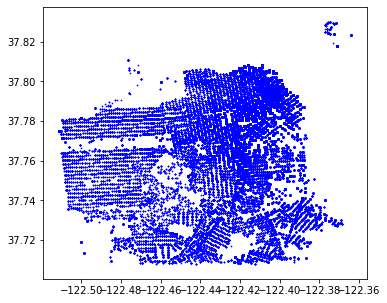

In [93]:
crime_time18.plot(figsize=(10,5),marker='o', color='b', markersize=0.5)

In [94]:
crime_time18_perday= crime_time18[['Incident Day of Week', 'zip', 'Hour']]

In [95]:
#Create new variable crime

crime_time18_perday.loc[:, 'Crimes']=1


/Users/marietoudione/anaconda3/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/marietoudione/anaconda3/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [96]:
crime_time18_perday = crime_time18_perday.groupby(['Incident Day of Week', 'zip', 'Hour']).sum().reset_index()

crime_time18_perday.sort_values('Crimes', ascending = False).head(10)

,Incident Day of Week,zip,Hour,Crimes
3805,Wednesday,94103,13,227
3179,Tuesday,94103,12,209
3182,Tuesday,94103,15,208
3808,Wednesday,94103,16,204
670,Monday,94103,12,201
3180,Tuesday,94103,13,200
3804,Wednesday,94103,12,200
36,Friday,94103,12,198
3807,Wednesday,94103,15,198
675,Monday,94103,17,190


In [97]:
sf_map = crime_time18_perday.merge(san_fran)
sf_map = gpd.GeoDataFrame(sf_map, geometry='geometry')
sf_map.crs = {'init': 'epsg:4326'}

/Users/marietoudione/anaconda3/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


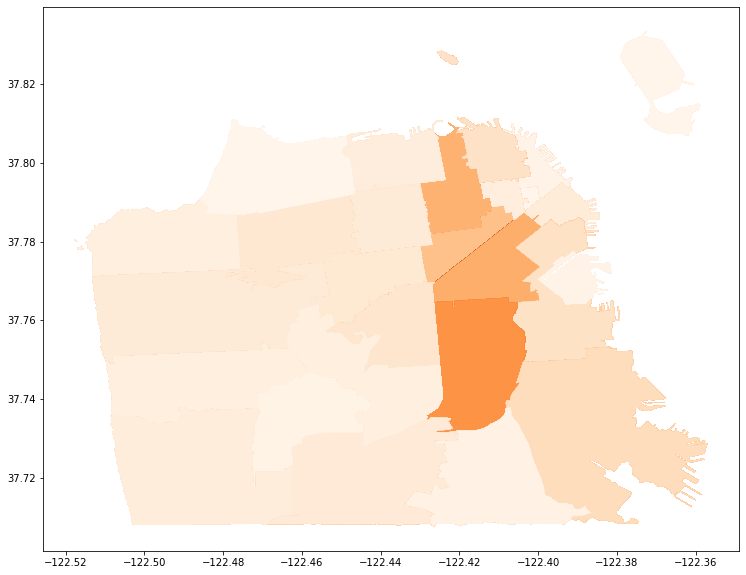

In [98]:
sf_map.plot(column='Crimes', cmap='Oranges', figsize=(20,10))

In [99]:
#Dummy variables for 2018 dataset

crime_time18_perday= crime_time18_perday[['Crimes', 'Hour', 'Incident Day of Week', 'zip']]

In [100]:
dummy_18 = pd.get_dummies(crime_time18_perday)

In [101]:
X_18 = dummy_18.iloc[:, 1:]
Y_18 = dummy_18.iloc[:, 0]

In [102]:
#Random Forest
rnd_clf = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, oob_score=True)
rnd_clf.fit(X_18, Y_18)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=16,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [103]:
rnd_clf.oob_score_

0.8066965016115826

In [104]:
#2019

df_police2019['geometry']=df_police2019.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

In [105]:

geo_police2019 = gpd.GeoDataFrame(df_police2019, geometry='geometry')
geo_police2019.crs= {'init':'epsg:4326'}

/Users/marietoudione/anaconda3/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [106]:
df_police2019 = gpd.tools.sjoin(geo_police2019, san_fran, how='left', op = 'within')

In [107]:
df_police2019.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,Report Type Code,...,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point,geometry,index_right,zip
0,1/1/19 00:00,1/1/19,00:00,2019,Tuesday,3/26/20 13:00,91565609029,915656,200209177,II,...,23348000.0,Central,Sunset/Parkside,4,37.740569,-122.489490,"(37.74056913014827, -122.48949003907518)",POINT (-122.48949 37.74057),22.0,94116
1,1/1/19 00:00,1/1/19,00:00,2019,Tuesday,2/26/20 13:45,90698764070,906987,200144642,II,...,25152000.0,Tenderloin,Tenderloin,6,37.785167,-122.417901,"(37.785167213738916, -122.41790141130261)",POINT (-122.41790 37.78517),16.0,94109
2,1/1/19 00:00,1/1/19,00:00,2019,Tuesday,1/25/19 08:15,76294807041,762948,190061114,VI,...,24276000.0,Southern,South of Market,6,37.775873,-122.408947,"(37.77587344423178, -122.4089467458297)",POINT (-122.40895 37.77587),11.0,94103
3,1/1/19 00:00,1/1/19,00:00,2019,Tuesday,7/23/19 12:48,82571964070,825719,190533919,II,...,20083000.0,Bayview,Bayview Hunters Point,10,37.731283,-122.379934,"(37.731282902583615, -122.37993438140147)",POINT (-122.37993 37.73128),0.0,94124
4,1/1/19 00:00,1/1/19,00:00,2019,Tuesday,3/19/19 15:37,78132174000,781321,190196909,II,...,24929000.0,Tenderloin,Tenderloin,6,37.783933,-122.412595,"(37.7839325760642, -122.41259527758581)",POINT (-122.41260 37.78393),10.0,94102


In [108]:
crime_time19 = df_police2019[['Incident Date','Incident Time','Incident Day of Week', 'geometry','zip']]

In [109]:
#crime_time19.loc[:, 'Date']= pd.to_datetime(crime_time19['Incident Date'])

crime_time19.loc[:, 'Hour']= pd.to_datetime(crime_time19['Incident Time'])
crime_time19.loc[:, 'Hour']= crime_time19.Hour.apply(lambda x: x.hour)

/Users/marietoudione/anaconda3/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/marietoudione/anaconda3/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [110]:
crime_time19.head()

,Incident Date,Incident Time,Incident Day of Week,geometry,zip,Hour
0,1/1/19,00:00,Tuesday,POINT (-122.48949 37.74057),94116,0
1,1/1/19,00:00,Tuesday,POINT (-122.41790 37.78517),94109,0
2,1/1/19,00:00,Tuesday,POINT (-122.40895 37.77587),94103,0
3,1/1/19,00:00,Tuesday,POINT (-122.37993 37.73128),94124,0
4,1/1/19,00:00,Tuesday,POINT (-122.41260 37.78393),94102,0


In [111]:
crime_time19_perday= crime_time19[['Incident Day of Week', 'zip', 'Hour']]

In [112]:
#Create new variable crime

crime_time19_perday['Crimes']=1

/Users/marietoudione/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [113]:
crime_time19_perday = crime_time19_perday.groupby(['Incident Day of Week', 'zip', 'Hour']).sum().reset_index()

In [114]:
crime_time19_perday.sort_values('Crimes', ascending = False).head(10)

,Incident Day of Week,zip,Hour,Crimes
656,Monday,94103,12,201
3787,Wednesday,94103,13,201
3161,Tuesday,94103,12,197
3164,Tuesday,94103,15,194
3788,Wednesday,94103,14,187
3768,Wednesday,94102,18,183
655,Monday,94103,11,182
3783,Wednesday,94103,9,181
3167,Tuesday,94103,18,181
3762,Wednesday,94102,12,180


In [115]:
#Dummy variables

crime_time19_perday= crime_time19_perday[['Crimes', 'Hour', 'Incident Day of Week', 'zip']]

In [116]:
dummy_19 = pd.get_dummies(crime_time19_perday)

In [117]:
X_19 = dummy_19.iloc[:, 1:]
Y_19 = dummy_19.iloc[:, 0]

In [118]:
#Gradient Boosting

gbrt= GradientBoostingRegressor(max_depth=3, n_estimators=200, learning_rate=1.0)
gbrt.fit(X_18, Y_18)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [119]:
gbrt.score(X_19, Y_19)

0.905179728372167

In [120]:
gbrt_pred= gbrt.predict(X_19)

gbrt_pred= gbrt.predict(X_19)

In [121]:
crime_time19_perday['Pred_GBRT'] = pd.Series(gbrt_pred)

In [122]:
crime_time19_perday.head()

,Crimes,Hour,Incident Day of Week,zip,Pred_GBRT
0,92,0,Friday,94102,107.510540
1,66,1,Friday,94102,40.588504
2,50,2,Friday,94102,31.306968
3,48,3,Friday,94102,20.464145
4,22,4,Friday,94102,20.018694


In [123]:
crime_time19_perday['Crimes']=crime_time19_perday['Crimes']/365

crime_time19_perday['Pred_GBRT']=crime_time19_perday['Pred_GBRT']/365

In [124]:
crime_time19_perday=np.round(crime_time19_perday, 2)

In [125]:
crime_time19_perday.head()

,Crimes,Hour,Incident Day of Week,zip,Pred_GBRT
0,0.25,0,Friday,94102,0.29
1,0.18,1,Friday,94102,0.11
2,0.14,2,Friday,94102,0.09
3,0.13,3,Friday,94102,0.06
4,0.06,4,Friday,94102,0.05


In [126]:
crime_time19_perday.to_json('~/DATA/crimes_pred2019.json', orient='records', double_precision=2)